# MOVIE VIEWERSHIP FORECAST AND MAJOR SPORT EVENT PREDICTION 

## Solace Stream

### Introduction
Solace Stream is a leading streaming media company that offers a vast library of movies, TV shows, documentaries, and original content catering to a global audience. Solace Stream is having a decline in viewership of their content on the first day of release and aims to develop a predictive model that can accurately forecast viewership levels and also determine the presence of major sports events that may impact viewership.

### Objective
 - Identify key variables that drive viewership
 - Implementation of regression module to forecast movie viewership
 - Implementation of classification module to predict major sports event on movie release day 

## Import of Libraries 

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# data modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model evaluation libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

## Import of Dataset

In [2]:
# load dataset

df = pd.read_csv('sttdata.csv')
df.head(5)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


## Dataset Assessment

In [3]:
# check data dimensionality, ie number of rows and columns

df.shape

(1000, 8)

In [4]:
# view dataset info: datatypes, null values, dimensionality 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
# statistical description of numerical features

df.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [6]:
# statistical description of categorical features

df.describe(include='object').T

,count,unique,top,freq
genre,1000,8,Others,255
dayofweek,1000,7,Friday,369
season,1000,4,Winter,257


In [7]:
# check for duplicated values

df.duplicated().sum()

0

In [8]:
# check for missing values

df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

## Exploratory Data Analysis (EDA)

- UNIVARIATE ANALYSIS

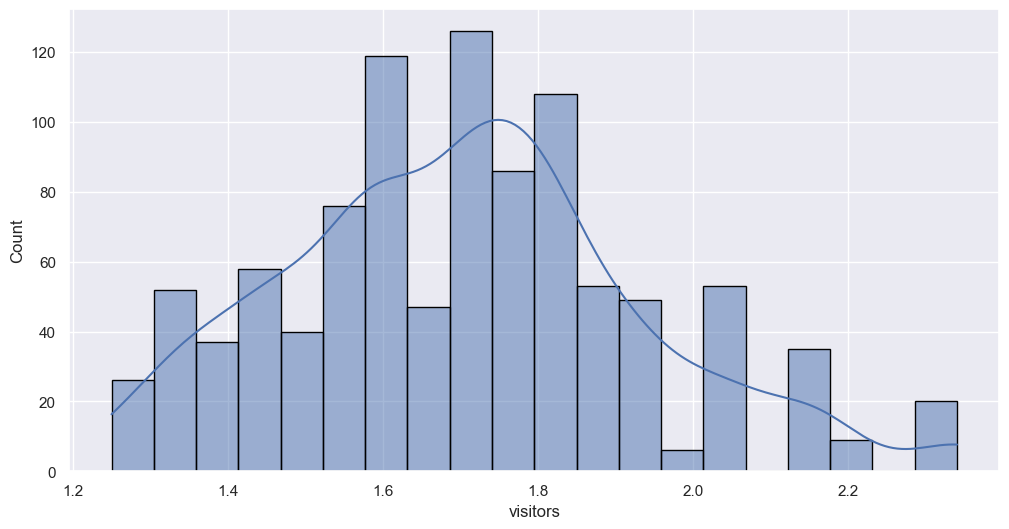

In [9]:
# distribution of average visitors to the platform for the past week

plt.figure(figsize=(12,6))
sns.histplot(x='visitors', data=df, edgecolor='black', kde=True);

the average visits in the past week to the movie platform is normally distributed with some outliers

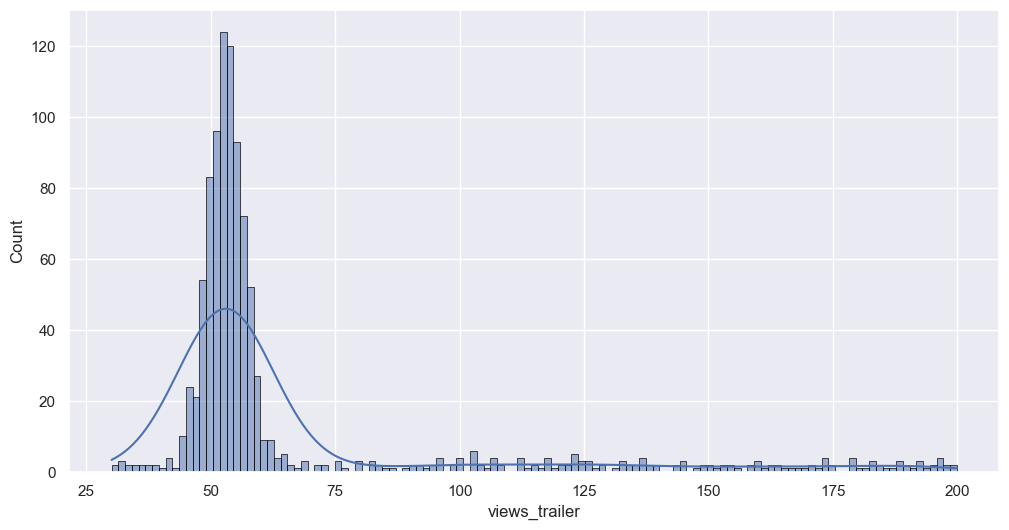

In [10]:
# distribution of trailers viewership

plt.figure(figsize=(12,6))
sns.histplot(x='views_trailer', data=df, edgecolor='black', kde=True);

trailer views is positively skewed with most trailers having low views

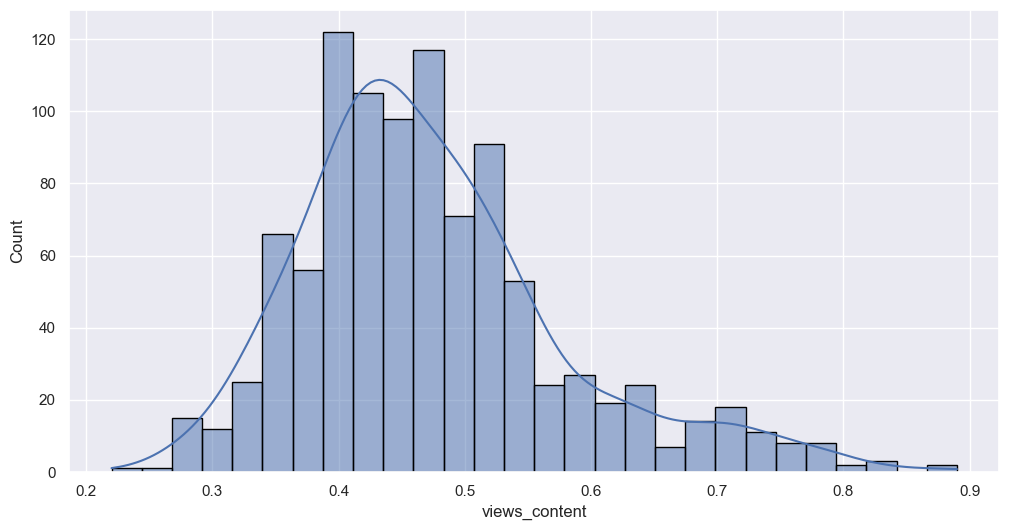

In [11]:
# distribution of dependent feature (content viewership)

plt.figure(figsize=(12,6))
sns.histplot(x='views_content', data=df, edgecolor='black', kde=True);

views content which is the dependent variable is normally distributed with observed outliers

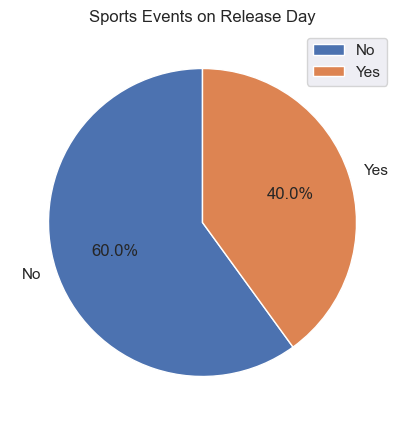

In [12]:
# major sports event: 1=Yes (there was mse), 0=No (there was no mse)
def mjs(event):
    if event == 1:
        return 'Yes'
    else: 
        return 'No'
    
df['mjs'] = df['major_sports_event'].apply(mjs)

# visualization the of major sports event on movie release day
plt.figure(figsize=(5,5))
plt.pie(df['mjs'].value_counts(), labels=df['mjs'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title('Sports Events on Release Day');

40% of movie release day concide with major sports event

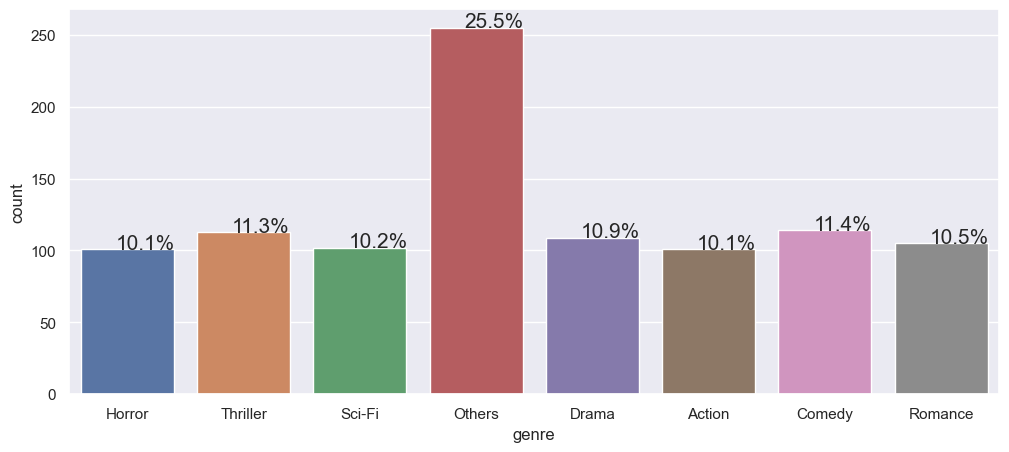

In [13]:
# count of all genres on the platform
plt.figure(figsize=(12,5))
ax = sns.countplot(x=df['genre']);

# percentage calculation
total = float(len(df['genre']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15) 

all genres are almost evenly distributed with only Others having high number making 25.5% of total count

- BIVARIATE ANALYSIS

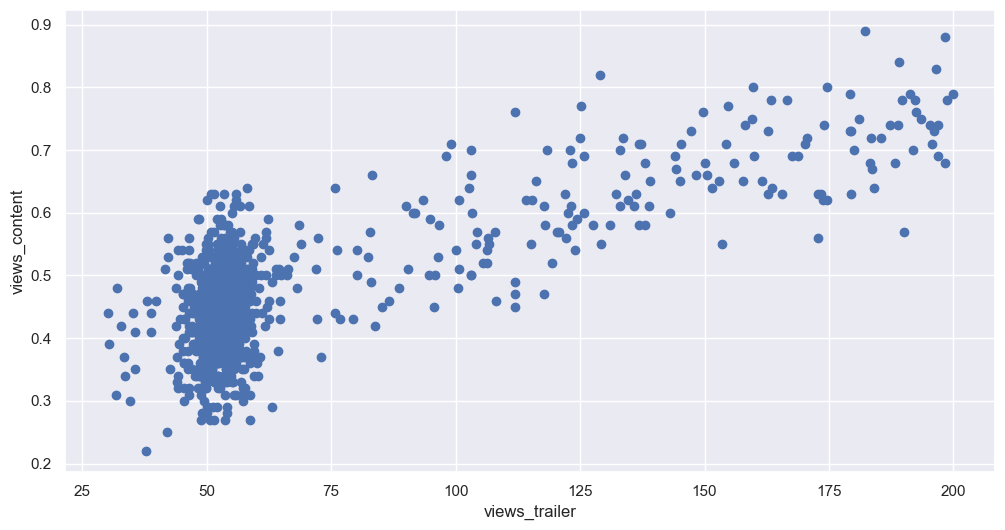

In [14]:
# visualizing the relationship between trailler and content viewership

plt.figure(figsize=(12,6))
plt.scatter(data=df, x='views_trailer', y='views_content')
plt.xlabel('views_trailer')
plt.ylabel('views_content');

there is a positive relationship between views_trailer and views_content meaning trailers viewed influence content viewed

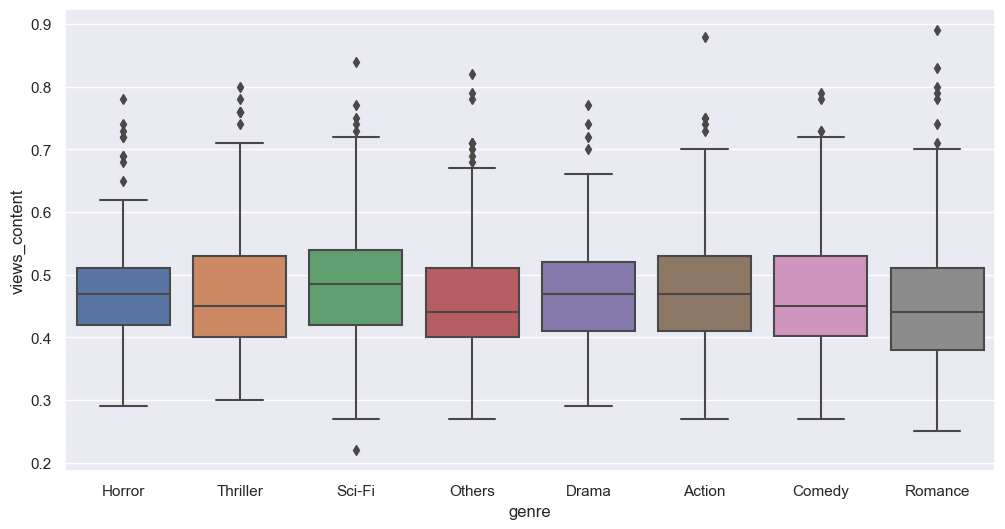

In [15]:
# count of content viewership across genres

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='genre', y='views_content');

from observation, Sci-Fi movies are the most viewed genre, closely followed by Comedy and Thriller while Drama Horror has the least views. this indicate the viewers preferred genres

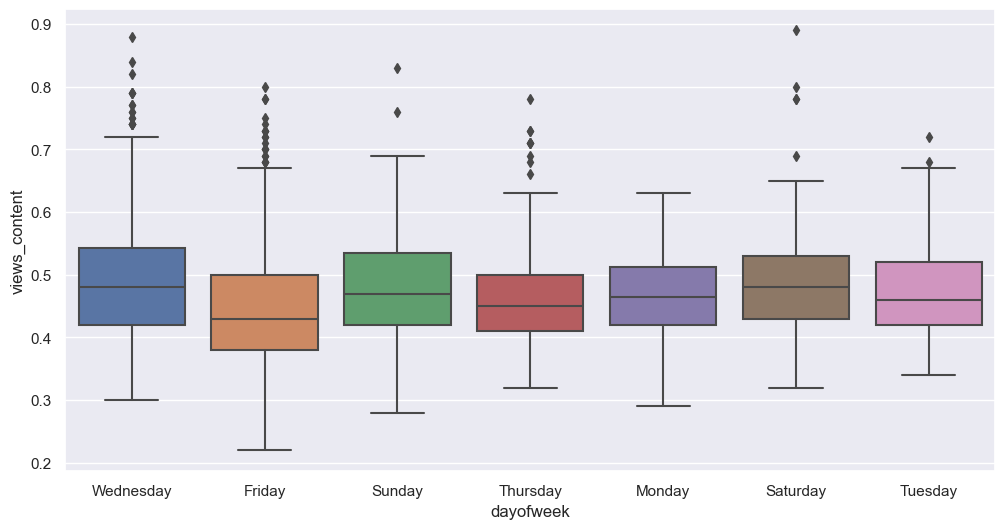

In [16]:
# count of content viewership across day of week

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dayofweek', y='views_content');

movie views are highest on Wednesday and Sunday. Thursday and Monday are days where views are low. this indicate the days it is advisable to relaease new movies

- MULTIVARIATE ANALYSIS

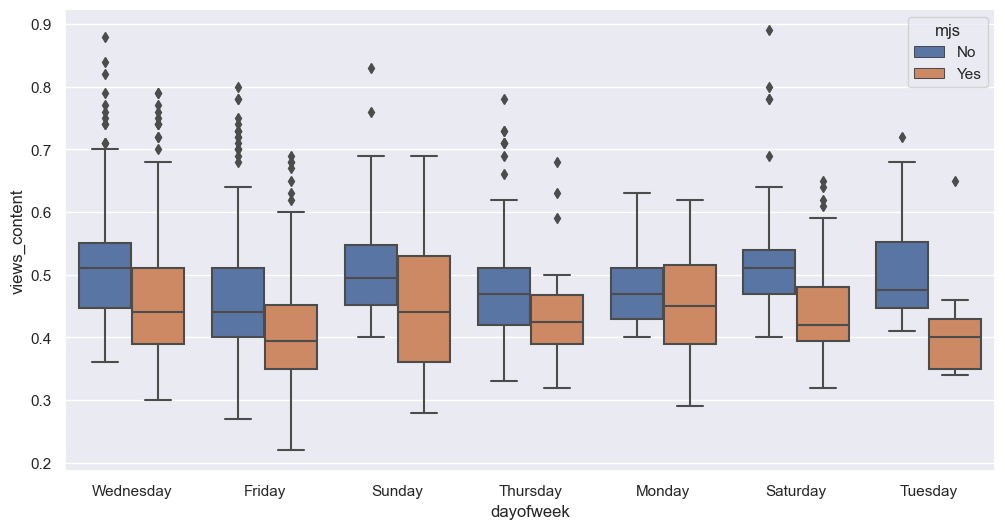

In [17]:
# count of content viewership across day of week by mahor sports event

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dayofweek', y='views_content', hue='mjs');

it can be observed that major sports event leads to lower views of the movies across all days except on Monday. this indicate that movies should not be released on major sports event days as it will negatively influence views_content

C:\Users\RANDY\AppData\Local\Temp\ipykernel_3588\2714119364.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\RANDY\AppData\Local\Temp\ipykernel_3588\2714119364.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='coolwarm', mask=mask, linewidths=0.9)


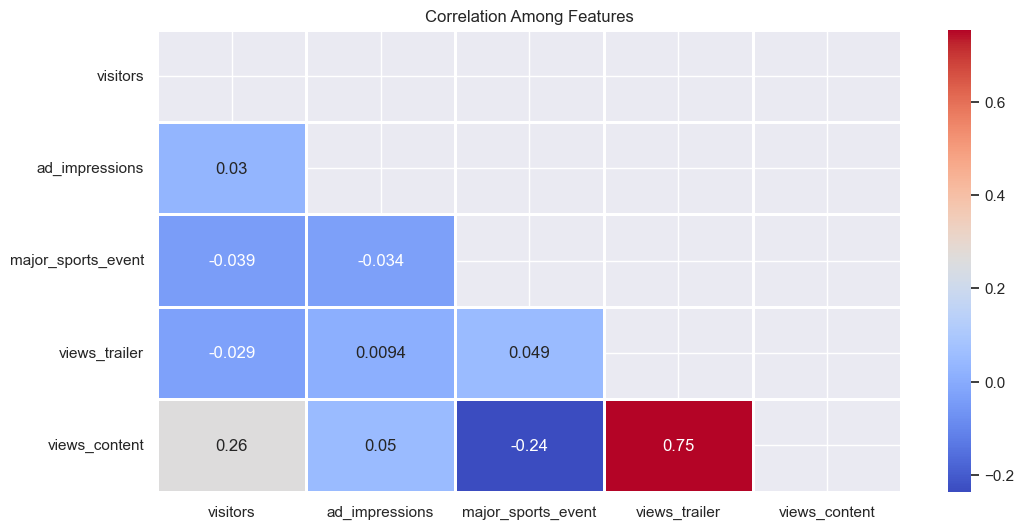

In [18]:
# correlation among features

plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='coolwarm', mask=mask, linewidths=0.9)
plt.title('Correlation Among Features');

the correllation between the dependent feature (views_content) and the other features is not strong with only views_trailer having strong influence on views_content. major sports event though has a negative influence on views_content this influence seems to be week.

## REGRESSION TASK

### Data Preprocessing

In [19]:
# drop mjs column
df.drop(columns='mjs', axis=1, inplace=True)

In [20]:
# label encode categorical features into numerical vales

encoder = LabelEncoder()  # initialize label encoder

# loop through features to fit and transform categorical data
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]

df.head(2)  

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,3,6,1,56.70,0.51
1,1.46,1498.41,1,7,0,0,52.69,0.32


In [21]:
# segment data into predictor(x) and target(y) variables

x = df.drop(columns='views_content', axis=1)
y = df['views_content']

In [22]:
# scaling dataset

scaler = StandardScaler()    # initializing scaler
x_scaled = scaler.fit_transform(x)

In [23]:
# spliting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=0)

### Model Building

In [24]:
# LINEAR REGRESSION
lr_model = LinearRegression()        # instantiate model
lr_model.fit(X_train, y_train)       # fit model to training set
lr_pred = lr_model.predict(X_test)   # model prediction

# RANDOM FOREST REGRESSOR
rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)
rfg_pred = rfg_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

### Model Evaluation

In [25]:
# Linear Regression Evaluation 
R2_lr = r2_score(y_test, lr_pred)
MSE_lr = mean_squared_error(y_test, lr_pred)
MAE_lr = mean_absolute_error(y_test, lr_pred)

# Random Forest Evaluation
R2_rfg = r2_score(y_test, rfg_pred)
MSE_rfg = mean_squared_error(y_test, rfg_pred)
MAE_rfg = mean_absolute_error(y_test, rfg_pred)

# XGBoost Regressor Evaluation
R2_xgb = r2_score(y_test, xgb_pred)
MSE_xgb = mean_squared_error(y_test, xgb_pred)
MAE_xgb = mean_absolute_error(y_test, xgb_pred)

print('EVALUATION OF REGRESSION MODELS')
print('-------------------------------')
pd.DataFrame({'LinearRegression': [R2_lr, MSE_lr, MAE_lr],
              'RandomForest': [R2_rfg, MSE_rfg, MAE_rfg],
              'XGBoost': [R2_xgb, MSE_xgb, MAE_xgb]},
              index=['R2 Score','MSE Score', 'MAE Score'])

EVALUATION OF REGRESSION MODELS
-------------------------------


,LinearRegression,RandomForest,XGBoost
R2 Score,0.730969,0.718646,0.682827
MSE Score,0.003203,0.003350,0.003776
MAE Score,0.045601,0.046265,0.049470


## CLASSIFICATION TASK

### Data Preprocessing

In [26]:
# segment data into predictor variables and target variables
x = df.drop(columns='major_sports_event', axis=1)
y = df['major_sports_event']

In [27]:
# scale dataset
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.7, random_state=0)

### Model Building

In [29]:
# NAIVE BAYES MODEL
nb_model = GaussianNB()                # instantiate model
nb_model.fit(X_train, y_train)         # fit model on training set
nb_pred = nb_model.predict(X_test)     # model predictions

# DECISION TREE CLASSIFIER
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

### Model Evaluation

Accuracy Score: 0.6666666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       183
           1       0.68      0.27      0.39       117

    accuracy                           0.67       300
   macro avg       0.67      0.60      0.58       300
weighted avg       0.67      0.67      0.62       300



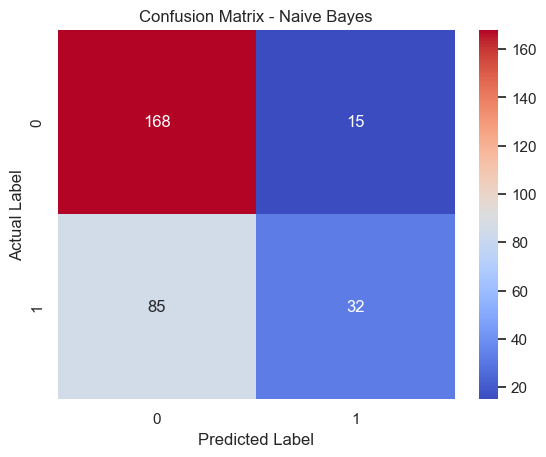

In [30]:
# Naive Bayes Evaluation
acc_nb = accuracy_score(y_test, nb_pred)
rep_nb = classification_report(y_test, nb_pred)
con_nb = confusion_matrix(y_test, nb_pred)

print(f'Accuracy Score: {acc_nb}')
print(f'Classification Report: \n {rep_nb}')
sns.heatmap(con_nb, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Naive Bayes');

Accuracy Score: 0.6466666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       183
           1       0.54      0.60      0.57       117

    accuracy                           0.65       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.65      0.65      0.65       300



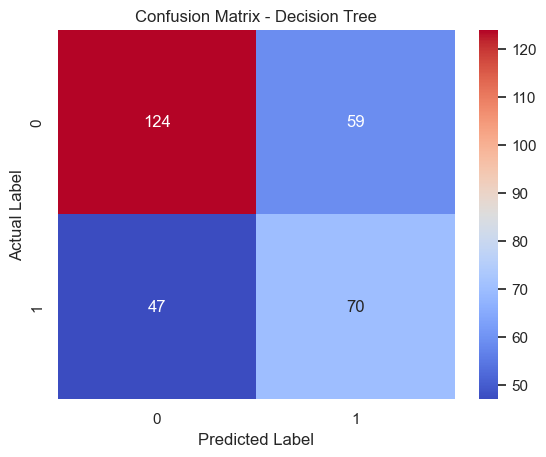

In [31]:
# Decision Tree Evaluation
acc_dt = accuracy_score(y_test, dt_pred)
rep_dt = classification_report(y_test, dt_pred)
con_dt = confusion_matrix(y_test, dt_pred)

print(f'Accuracy Score: {acc_dt}')
print(f'Classification Report: \n {rep_dt}')
sns.heatmap(con_dt, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Decision Tree');

## Insights:
- There is low viewership for most trailers which has positive relationship content viewership.
- 40% of content release day coincide with major sport event which negatively affect content viewership.
- Sci-Fi, Comedy and Thriller are preferred genres with Drama and Horror least preferred genres.
- Most of the movies released belong to the Others genre (25.5%) which has low viewership.
- Movies released on Wednesdays has the most viewership with Monday and Thursday released movies bringing least content views.

## Recommedations:
- Solace Stream should use the classification models to guide movie release days to reduce coincidence with major sports event which negatively affect  content viewership.
- Use regression model to optimize features in boosting future content viewership. Example trailer views which has positive relationship with content viewership can be improved. 